# ChatGPT API 연습

## ChatGPT API를 이용하기 위해서는 다음의 내용을 미리 수행해야 합니다.

1. ChatGPT API Key 발급<br>
2. 가상환경 설치(anaconda)<br>
3. Python 및 필요한 라이브러리 설치: pip install [패키지명]<br>

### <b>API</b>(Application Programming Interface)란?<br>
여러 가지 프로그램이나 소프트웨어를 사람이 아닌, 프로그램이 직접 의사소통할 수 있는 방법을 말합니다.<br>
사람은 인터넷 창이나 앱을 실행해서 직접 메시지를 입력하고 정답을 확인하지만, 컴퓨터 프로그램은 그런 과정 없이도 수행할 수 있어야 하는데,<br>
이를 위해 만든 별도의 방법을 API라고 합니다.<br><br>
대부분의 API는 JSON 또는 XML 형태로 데이터를 주고 받습니다.<br>
<b>JSON</b>은 아래와 같이 딕셔너리의 형태로 된 객체를 말하며 자바스크립트에서 객체를 표시하는 기준으로, 텍스트 기반의 데이터 교환 방법입니다.<br>
<b>XML</b>도 데이터 중심이기는 하나, HTML과 유사한 형태를 띤다는 점에서 JSON과 차이가 있습니다. 대부분의 XML은 암호화된 형태의 텍스트로 데이터를 주고 받습니다.

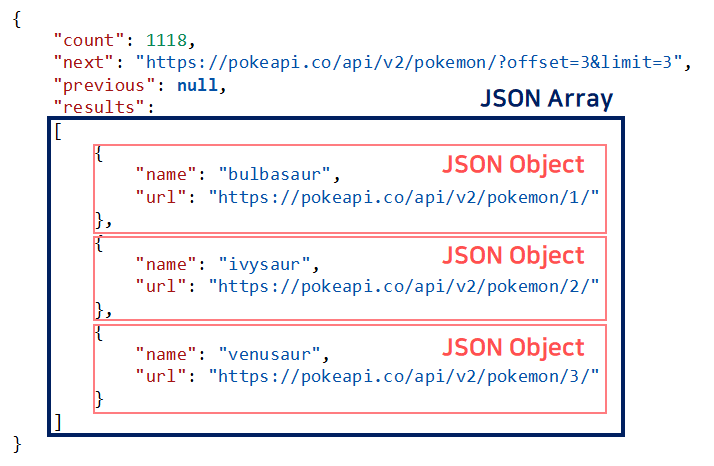

In [1]:
import os
import re
import openai
import markdown
from getpass import getpass

In [2]:
# 다음은 자신이 사전에 OpenAI를 통해 발급받은 키를 입력하는 과정입니다. 노출을 막기 위해 패스워드 형태로 입력되도록 하였습니다.
# 키를 복사하여 입력한 뒤. Enter Key를 입력합니다.
OPENAI_API_KEY = getpass('your API Key(starting with sk-)')

your API Key(starting with sk-)········


In [3]:
# Temperature 값의 범위는 0부터~ (값이 작으면 자유도가 낮고, 값이 커지면 자유도가 높습니다. 자유도가 높으면 응답할 때마다 다른 답이 나올 가능성이 높아집니다.)
TEMPERATURE = 0.1 
MAX_TOKENS = 4096  # GPT-3.5의 최대 토큰 길이임(입력, 출력 동일함)
MODEL = 'gpt-3.5-turbo-0613'
# MODEL = 'gpt-3.5-turbo-16k'
openai.api_key = OPENAI_API_KEY
context = [] # 리스트

## 인터넷 창과 같은 간단한 대화형 인공지능에 대한 예시

In [4]:
def check_tokens(items):
    cnt = 0

    if items is None:
        return cnt

    for item in items:
        cnt += len(item['content'])

    return cnt

# ChatGPT API를 이용한 대화에서는 3가지가 필요합니다.
# 인공지능이 어떤 역할을 할지 지정할 수 있습니다. 교사, 변호사, 글쓰기 전문가, 작가 등 다양하게 지정할 수 있습니다.
# 아래의 코드에서 {'role':'system', ...}은 AI에 대한 역할과 내용을,
# {'role':'user', ...}은 사용자가 요청하는 질문이나 요청을 뜻합니다.
def conversate():
    while(1):
        message = input('대화:')
        message = message.strip()
    
        if message == '':
            print('대화 내용을 입력하세요.')
            continue
        elif message == 'exit':
            break
    
        # 대화 맥락을 고려하여 전체 최대 토큰을 초과하는지 체크하도록 한다.
        total_cnt = check_tokens(context) + len(message)

        if total_cnt >= MAX_TOKENS:
            context.clear()
            print('context cleared.')

        # ChatGPT 대화를 위한 메시지 형태 설정하기
        if len(context) == 0:
            context.append({"role": "system", "content": "You are a helpful assistant."})
            context.append({"role": "user", "content": message})
        else:
            context.append({"role": "user", "content": message})

        response = openai.ChatCompletion.create(model=MODEL, messages=context, temperature=TEMPERATURE)

        answer = response['choices'][0]['message']['content']
        print(f"AI: {answer}")
        context.append({'role': 'assistant', 'content': answer})

        if check_tokens(context) >= MAX_TOKENS:
            context.clear()

In [5]:
# 대화를 종료하고 싶을 때는 exit라는 문구를 입력하면 종료하도록 프로그래밍되어 있습니다.
# 이전 맥락을 기억하도록 구성되어 있습니다.
conversate()

대화:안녕!
AI: 안녕하세요! 도움이 필요하신가요?
대화:1부터 100까지 더하면 얼마야?
AI: 1부터 100까지 더하면 총 5050입니다.
대화:200까지는?
AI: 1부터 200까지 더하면 총 20100입니다.
대화:1부터 100까지 소수는 몇 개 있어?
AI: 1부터 100까지의 소수는 총 25개입니다. 소수는 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97입니다.
대화:200까지는?
AI: 1부터 200까지의 소수는 총 46개입니다. 소수는 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199입니다.
대화:exit


In [6]:
# 여러 개의 대화가 아니라 한 번의 질문에 대답하는 함수
def single_ask(message):
    message = message.strip()

    if message == '':
        print('대화 내용을 입력하세요.')
    elif message == 'exit':
        return

    # 대화 맥락을 고려하여 전체 최대 토큰을 초과하는지 체크하도록 한다.
    total_cnt = check_tokens(context) + len(message)

    if total_cnt >= MAX_TOKENS:
        context.clear()
        print('context cleared.')

    # ChatGPT 대화를 위한 메시지 형태 설정하기
    if len(context) == 0:
        context.append({"role": "system", "content": "You are a helpful assistant."})
        context.append({"role": "user", "content": message})
    else:
        context.append({"role": "user", "content": message})

    response = openai.ChatCompletion.create(model=MODEL, messages=context, temperature=TEMPERATURE)

    answer = response['choices'][0]['message']['content']
    print(f"AI: {answer}")
    #codes = markdown.markdown(answer, extensions=['fenced_code', 'codehilite'])
    context.append({'role': 'assistant', 'content': answer})

    if check_tokens(context) >= MAX_TOKENS:
        context.clear()

In [7]:
single_ask("1부터 100까지의 숫자 중 소수인 숫자를 모두 알려 줘.")

AI: 1부터 100까지의 소수는 다음과 같습니다:

2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97


In [16]:
# 토론하도로 구성된 함수
def debate(topic = ''):
    while(1):
        message = input('사람: ')
        message = message.strip()
    
        if message == '':
            print('대화 내용을 입력하세요.')
            continue
        elif message == 'exit':
            break
    
        if topic == '':
            #입력한 토픽이 없다면 아래의 주제로 진행하도록 한다.
            topic = '전동 킥보드의 운전 면허 발급 문제'
        # 대화 맥락을 고려하여 전체 최대 토큰을 초과하는지 체크하도록 한다.
        total_cnt = check_tokens(context) + len(message)

        if total_cnt >= MAX_TOKENS:
            context.clear()
            print('context cleared.')

        # ChatGPT 대화를 위한 메시지 형태 설정하기
        if len(context) == 0:
            context.append({"role": "system", "content": f"너는 이제부터 훌륭한 토론자이야. {topic}로 토론할 거야. 너는 내가 제시하는 의견에 대해 반대 입장을 택하고, 그에 따라 반론을 제기해."})
            context.append({"role": "user", "content": message})
        else:
            context.append({"role": "user", "content": message})

        response = openai.ChatCompletion.create(model=MODEL, messages=context, temperature=TEMPERATURE)

        answer = response['choices'][0]['message']['content']
        print(f"AI: {answer}")
        context.append({'role': 'assistant', 'content': answer})

        if check_tokens(context) >= MAX_TOKENS:
            context.clear()

In [17]:
# 전동 킥보드의 면허 발급 문제, 원하는 주제가 있다면 인자로 입력하도록 한다.
# exit를 입력하면 종료
debate()

사람: 전동 킥보드도 자동차나 오토바이처럼 면허가 있는 사람만 운전해야 한다고 생각해. 도로나 인도를 막 주행하면서 보행자도 위험하게 하고, 운전하는 차량들도 깜짝 놀랠 때가 많아.
AI: 반대 입장으로 말씀드리자면, 전동 킥보드의 운전 면허 발급은 필요하지 않다고 생각합니다. 전동 킥보드는 자전거와 유사한 속도와 크기를 가지고 있으며, 대부분의 국가에서는 자전거 운전에 대한 면허 요구가 없습니다. 따라서 전동 킥보드 운전에 대한 면허 요구는 과도한 규제일 수 있습니다.

또한, 전동 킥보드는 대중 교통 수단이 아니기 때문에 도로를 주행하는 차량들과의 충돌 위험이 상대적으로 낮습니다. 보행자와의 충돌 위험에 대해서는, 전동 킥보드 운전자들에게 적절한 교육과 안전 수칙을 제공하여 이를 해결할 수 있습니다. 예를 들어, 보행자 전용 도로를 사용하거나 보행자와의 거리를 유지하는 등의 조치를 취할 수 있습니다.

마지막으로, 전동 킥보드 운전 면허 발급은 접근성 문제를 야기할 수 있습니다. 면허 발급에는 시간과 비용이 소요되며, 일부 사람들은 이러한 절차를 따르기 어려울 수 있습니다. 이는 전동 킥보드를 이용하여 일상적인 이동 수단으로 활용하려는 사람들에게 불편을 초래할 수 있습니다.

따라서, 전동 킥보드의 운전 면허 발급은 필요하지 않다고 주장합니다. 대신에, 운전자들에게 적절한 교육과 안전 수칙을 제공하여 보행자와의 충돌 위험을 최소화하고, 전동 킥보드를 보다 안전하게 이용할 수 있도록 지원해야 한다고 생각합니다.
사람: 그런데 전동 킥보드로 인한 사고가 해마다 늘고 있고, 이로 인한 인명 피해도 심각해지고 있어.
AI: 전동 킥보드로 인한 사고가 증가하고 있는 것은 사실입니다. 그러나 이는 전동 킥보드 운전자들의 무책임한 운전이나 안전 수칙을 무시한 행동에 기인한 것이라고 볼 수 있습니다. 이러한 문제는 운전자들에게 적절한 교육과 안전 수칙을 제공하여 예방할 수 있습니다.

면허 발급을 통해 운전자들을 교육하고 테스트하는 것은 사고 예방에 도움이 될 수 있습니

## 논증 분석을 위한 ChatGPT API 활용

툴민(Toulmin)의 논증 모형은 주어진 텍스트에서 주장과 자료, 보장 등 논리 구조를 파악하는 것으로, <br>
아래의 API는 주어진 텍스트에 대해 논증 요소를 추출하고 평가하여 보다 나은 글쓰기를 위한 피드백 의견을 제공하도록 구성되어 있습니다.

In [18]:
query = '''"보기"는 학생이 작성한 글이야. 툴민의 논증(Toulmin's Argumentation Pattern)에 따라 글에 포함되어 있는 주장(claim), 반박(rebuttal), 자료(data), 보장(warrant), 뒷받침(backing), 제한 조건(qualifer)이 명시적으로 포함되어 있는지 확인하고 추출해. 
만약 관련된 요소가 글 속에 포함되어 있지 않다면 '없음'으로 표시해. 
논증 요소의 정의는 다음과 같아.
주장(claim): Assertions about what exists or values that people hold. 
자료(data): Statements that are used as evidence to support the claim. 
보장(warrant): Statements that explain the relationship of the data to the claim. 
제한 조건(qualifier): Special conditions under which the claim holds true. 
뒷받침(backing): Underlying assumptions that are often not made explicit. 
반박(rebuttal): Statements that contradict either the data, warrant, backing or qualifier of an argument. 
또한 학생의 논증에 대한 점수을 0점에서 5점까지로 평가하려고 해. 평가한 결과에 대한 점수와 함께 글을 더 잘 쓸 수 있도록 쉽고 구체적으로 피드백을 줘.
채점 기준은 다음과 같아.
0점: Argumentation does not include anything of elements.
1점: Argumentation consists of arguments that are a simple claim versus a counter-claim or a claim versus a claim.
2점: Argumentation has arguments consisting of a claim versus a claim with either data, warrants, or backings but do not contain any rebuttals.
3점: Argumentation has arguments with a series of claims or counterclaims with either data, warrants, or backings with the occasional weak rebuttal.
4점: Argumentation shows arguments with a claim with a clearly identifiable rebuttal. Such an argument may have several claims and counterclaims as well.
5점: Argumentation displays an extended argument with more than one rebuttal.
수행한 결과를 다음과 같은 형식으로 한글로 반환해 줘.
주장:{결과}
반박:{결과}
자료:{결과}
보장:{결과}
뒷받침:{결과}
제한 조건:{결과}
점수:{결과}
피드백:{결과}
보기:'''

In [19]:
elements = ['주장', '반박', '자료', '보장', '뒷받침', '제한 조건', '점수', '피드백']
elements2 = ['claim', 'rebuttal', 'data', 'warrant', 'back', 'qualify', 'score', 'feedback']
none_list = ['없습니다.', '없음.', '없습니다', '없음', '(없음)', '(없음.)', '(없음).', '(없습니다.)', '(없습니다)']

def inspect_data(text):
    is_first = True
    
    try:
        text = text.strip()
        print('Original:', text)
        query_msg = query + text

        # 메시지 설정하기
        messages = [
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": query_msg}
        ]

        # ChatGPT API 호출하기
        response = openai.ChatCompletion.create(model=MODEL, messages=messages, temperature=TEMPERATURE)
        answer = response.choices[0].message['content']
        answer = answer.strip()

        print(answer)

        arguments = {}

        for item in elements:
            arguments[item] = ''

        current_key = None

        for line in answer.split('\n'):
            line = line.strip()
            line = line.strip('\n')

            if line:
                if ':' in line:
                    key, value = line.split(':', 1)
                    current_key = key.strip()
                    value = value.strip()
                    value = value.strip('\n')
                    arguments[current_key] = value
                else:
                    arguments[current_key] += ' ' + line.strip()

        for key, value in arguments.items():
            for item in none_list:
                if item in value:
                    arguments[key] = ''
                    break

        updated_arguments = {}
        for key, value in arguments.items():
            for item in elements:
                if item in key:
                    new_key = item
                    break
                else:
                    new_key = key

            updated_arguments[new_key] = value

        cleaned_arguments = {key.strip("[]"): value for key, value in updated_arguments.items()}
        if cleaned_arguments['점수'] == '':
            cleaned_arguments['점수'] = 0
        else:
            cleaned_arguments['점수'] = int(re.sub(r'\D', '', cleaned_arguments['점수']))

        for i in range(len(elements)):
            cleaned_arguments[elements2[i]] = cleaned_arguments.pop(elements[i])

    except openai.error.APIError as e:
        #Handle API error here, e.g. retry or log
        print(f"OpenAI API returned an API Error: {e}")
        
    except openai.error.APIConnectionError as e:
        #Handle connection error here
        print(f"Failed to connect to OpenAI API: {e}")
        
    except openai.error.RateLimitError as e:
        #Handle rate limit error (we recommend using exponential backoff)
        print(f"OpenAI API request exceeded rate limit: {e}")
    
    return cleaned_arguments

In [20]:
sents = '''유진이는 부산에서 태어났다. 왜냐하면 부산에서 태어난 사람은 일반적으로 대한민국 국민일 것이기 때문이다.
다음과 같은 법조항과 규정들을 근거로(국적법). 그래서 그의 부모가 외국인이었거나 그가 귀화한 미국인이 된 경우가 아니라면 유진이는 한국인이다.'''

In [21]:
result_dict = inspect_data(sents)

Original: 유진이는 부산에서 태어났다. 왜냐하면 부산에서 태어난 사람은 일반적으로 대한민국 국민일 것이기 때문이다.
다음과 같은 법조항과 규정들을 근거로(국적법). 그래서 그의 부모가 외국인이었거나 그가 귀화한 미국인이 된 경우가 아니라면 유진이는 한국인이다.
주장: 유진이는 한국인이다.
반박: 없음
자료: 유진이는 부산에서 태어났다.
보장: 부산에서 태어난 사람은 일반적으로 대한민국 국민일 것이다.
뒷받침: 없음
제한 조건: 없음
점수: 3
피드백: 주장과 자료, 보장이 명시적으로 포함되어 있으나, 반박과 뒷받침, 제한 조건이 부족합니다. 또한, 주장과 자료, 보장이 강력한 반박 없이 연결되어 있습니다. 좀 더 강력한 반박과 뒷받침, 제한 조건을 추가하여 논증을 강화할 수 있습니다.


In [22]:
result_dict

{'claim': '유진이는 한국인이다.',
 'rebuttal': '',
 'data': '유진이는 부산에서 태어났다.',
 'warrant': '부산에서 태어난 사람은 일반적으로 대한민국 국민일 것이다.',
 'back': '',
 'qualify': '',
 'score': 3,
 'feedback': '주장과 자료, 보장이 명시적으로 포함되어 있으나, 반박과 뒷받침, 제한 조건이 부족합니다. 또한, 주장과 자료, 보장이 강력한 반박 없이 연결되어 있습니다. 좀 더 강력한 반박과 뒷받침, 제한 조건을 추가하여 논증을 강화할 수 있습니다.'}

In [23]:
result_dict['score']

3